In [206]:
pip install xlrd==1.2.0


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\92335\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [207]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\92335\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [507]:
import pandas as pd
import datetime
#import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import datetime

import math
import seaborn as sns
from matplotlib import pyplot as plt

from dateutil.relativedelta import relativedelta

from datetime import date


In [508]:
df = pd.read_excel("Customer&_Orders_-_Networks_SBN_2021_04_04.xlsx", engine='openpyxl')



# Data Cleaning & Preprocessing

In [509]:
df.head()

,customer_id,name,phone,user_created_at,company_id,order_id,order_created,order_complete,location_id,location_cordinates
0,1897,Shahid,923352110246,2020-07-05T04:26:14,8,20479,2020-07-12T19:43:00,1052.0,44,"{""longitude"":24.769556,""latitude"":24.769556}"
1,1897,Shahid,923352110246,2020-07-05T04:26:14,8,69929,2020-09-23T05:43:14,9727.0,44,"{""longitude"":24.769556,""latitude"":24.769556}"
2,1897,Shahid,923352110246,2020-07-05T04:26:14,8,78445,2020-09-29T05:56:19,10468.0,44,"{""longitude"":24.769556,""latitude"":24.769556}"
3,1898,Sajid,923453097562,2020-07-06T13:52:21,8,19253,2020-07-07T12:11:00,2436.0,44,"{""longitude"":67.069099,""latitude"":24.956178}"
4,1898,Sajid,923453097562,2020-07-06T13:52:21,8,19254,2020-07-07T12:12:00,1870.0,44,"{""longitude"":67.069099,""latitude"":24.956178}"


In [510]:
item_counts = df["customer_id"].value_counts()
print(item_counts)
item_counts = dict(item_counts)

len(item_counts)


2334     324
2123     216
2852     206
2266     179
2192     178
        ... 
5209       1
9871       1
13965      1
13405      1
14893      1
Name: customer_id, Length: 9174, dtype: int64


9174

In [511]:
df.sort_values(by=['order_created'])

,customer_id,name,phone,user_created_at,company_id,order_id,order_created,order_complete,location_id,location_cordinates
36129,6388,Pakistan Bakers,92300000000,2020-02-10T00:00:00,8,10585,2019-11-05T19:29:00,1050.0,44,"{""latitude"":24.948349,""longitude"":67.082589}"
36177,6389,Pak Bakery 2,923072730270,2020-02-10T00:00:00,8,10586,2019-11-06T11:47:00,790.0,44,"{""latitude"":24.948349,""longitude"":67.082589}"
1047,2028,Rajab Ali,923322771202,2020-02-11T00:00:00,8,10588,2019-11-06T21:08:00,849.0,44,"{""longitude"":67.115027,""latitude"":24.909772}"
36130,6388,Pakistan Bakers,92300000000,2020-02-10T00:00:00,8,10592,2019-11-07T18:27:00,497.0,44,"{""latitude"":24.948349,""longitude"":67.082589}"
959,2027,Muhammad Ali,923229459343,2020-02-11T00:00:00,8,10593,2019-11-07T19:00:00,468.0,44,"{""longitude"":67.099386,""latitude"":24.941586}"
...,...,...,...,...,...,...,...,...,...,...
2398,2111,Sajjad,923022871372,2020-02-18T00:00:00,8,11143,NaN,6506.0,44,"{""longitude"":67.1264489,""latitude"":24.91373}"
2399,2111,Sajjad,923022871372,2020-02-18T00:00:00,8,11194,NaN,1966.0,44,"{""longitude"":67.1264489,""latitude"":24.91373}"
2400,2111,Sajjad,923022871372,2020-02-18T00:00:00,8,11372,NaN,4419.0,44,"{""longitude"":67.1264489,""latitude"":24.91373}"
3891,2172,Sohail Anwar,923342222103,2020-02-20T00:00:00,8,11295,NaN,1010.0,44,"{""longitude"":67.115416,""latitude"":24.909802}"


In [512]:
df.tail(30)

,customer_id,name,phone,user_created_at,company_id,order_id,order_created,order_complete,location_id,location_cordinates
70029,16072,Javed,923452299652,2020-10-17T13:02:51,8,115703,2020-10-25T21:20:09,15929.0,44,"{""longitude"":67.13696401566267,""latitude"":24.8..."
70030,16072,Javed,923452299652,2020-10-17T13:02:51,8,555125,2021-03-26T23:23:10,3405.0,44,"{""longitude"":67.13696401566267,""latitude"":24.8..."
70031,16072,Javed,923452299652,2020-10-17T13:02:51,8,630293,2021-03-31T19:31:35,9456.0,44,"{""longitude"":67.13696401566267,""latitude"":24.8..."
70032,16072,Javed,923452299652,2020-10-17T13:02:51,8,630620,2021-04-01T05:23:09,1792.0,44,"{""longitude"":67.13696401566267,""latitude"":24.8..."
70033,16073,Amir,923002375209,2020-10-17T13:04:59,8,117107,2020-10-26T05:49:35,12073.0,44,"{""longitude"":67.17798940837382,""latitude"":24.8..."
70034,16073,Amir,923002375209,2020-10-17T13:04:59,8,118819,2020-11-01T13:06:44,4670.0,44,"{""longitude"":67.17798940837382,""latitude"":24.8..."
70035,16073,Amir,923002375209,2020-10-17T13:04:59,8,128484,2020-11-08T14:54:51,8615.0,44,"{""longitude"":67.17798940837382,""latitude"":24.8..."
70036,16073,Amir,923002375209,2020-10-17T13:04:59,8,168049,2020-11-23T13:32:54,7108.0,44,"{""longitude"":67.17798940837382,""latitude"":24.8..."
70037,16073,Amir,923002375209,2020-10-17T13:04:59,8,592318,2021-03-31T14:29:14,4300.0,44,"{""longitude"":67.17798940837382,""latitude"":24.8..."
70038,16074,Shujjad Bhai,923331221856,2020-10-17T13:11:29,8,103898,2020-10-17T13:14:31,2505.0,44,"{""longitude"":67.0477093,""latitude"":24.9030432}"


In [513]:
df['user_created_at'] = df['user_created_at'].str.replace('T',' ')
df['order_created'] = df['order_created'].str.replace('T',' ')

In [514]:
df['user_created_at'] = pd.to_datetime(df['user_created_at']).dt.date
df['order_created'] = pd.to_datetime(df['order_created']).dt.date


In [515]:
df1 = df.copy()

In [516]:
#df1 = df.groupby('order_created')[['order_complete']].sum()

df1 = df.groupby(
    ['order_created', 'customer_id']
).agg(
    {
        # Find the min, max, and sum of the duration column
        'order_complete': 'sum' ,
        
    }
)

In [517]:
df1.head(10)

order_complete
order_created customer_id                
2019-11-05    6388                 1050.0
2019-11-06    2028                  849.0
              6389                  790.0
2019-11-07    2027                  468.0
              2028                 4958.0
              6388                  497.0
2019-11-08    6390                 3326.0
2019-11-09    6388                  392.0
2019-11-11    6388                 2782.0
              6392                 7464.0

In [518]:
df1.head(30)

order_complete
order_created customer_id                
2019-11-05    6388                 1050.0
2019-11-06    2028                  849.0
              6389                  790.0
2019-11-07    2027                  468.0
              2028                 4958.0
              6388                  497.0
2019-11-08    6390                 3326.0
2019-11-09    6388                  392.0
2019-11-11    6388                 2782.0
              6392                 7464.0
2019-11-12    2025                 1270.0
              2028                 2286.0
              6388                 6226.0
              6391                10856.0
              6392                 8916.0
2019-11-13    2025                 2946.0
              4010                 6268.0
2019-11-14    2025                 1512.0
              2028                 1380.0
              4010                 1224.0
              6391                 3162.0
2019-11-15    2027                  546.0
2019-11-16    2025                 1680.0
2019-11-18    2027                 1009.0
              2028                 1401.0
              3752                 6622.0
              4010                 8207.0
              6389                 1320.0
              6392                 3196.0
2019-11-19    6388                  630.0

In [519]:
df2 = pd.merge( df1,df, on=['order_created','customer_id'], how='inner')

In [520]:
item_counts = df2["customer_id"].value_counts()
print(item_counts)
item_counts = dict(item_counts)

len(item_counts)


2334     324
2123     216
2852     206
2266     179
2192     178
        ... 
5209       1
9871       1
13965      1
13405      1
14893      1
Name: customer_id, Length: 9174, dtype: int64


9174

In [521]:
df2 = df2.drop('order_complete_y', axis=1)

In [522]:
df2 = df2.drop('order_id', axis=1)

In [523]:
df2 = df2.drop('company_id', axis=1)

In [524]:
df2 = df2.drop('location_id', axis=1)

In [525]:
item_counts = df2["customer_id"].value_counts()
print(item_counts)
item_counts = dict(item_counts)

len(item_counts)


2334     324
2123     216
2852     206
2266     179
2192     178
        ... 
5209       1
9871       1
13965      1
13405      1
14893      1
Name: customer_id, Length: 9174, dtype: int64


9174

In [526]:
df2 = df2.drop_duplicates()


In [527]:
len(df2)

61483

In [528]:
df2.head()

,order_created,customer_id,order_complete_x,name,phone,user_created_at,location_cordinates
0,2019-11-05,6388,1050.0,Pakistan Bakers,92300000000,2020-02-10,"{""latitude"":24.948349,""longitude"":67.082589}"
1,2019-11-06,2028,849.0,Rajab Ali,923322771202,2020-02-11,"{""longitude"":67.115027,""latitude"":24.909772}"
2,2019-11-06,6389,790.0,Pak Bakery 2,923072730270,2020-02-10,"{""latitude"":24.948349,""longitude"":67.082589}"
3,2019-11-07,2027,468.0,Muhammad Ali,923229459343,2020-02-11,"{""longitude"":67.099386,""latitude"":24.941586}"
4,2019-11-07,2028,4958.0,Rajab Ali,923322771202,2020-02-11,"{""longitude"":67.115027,""latitude"":24.909772}"


In [529]:
df2["location_cordinates"] = df2["location_cordinates"].apply(lambda x : dict(eval(x)) )
df3 = df2["location_cordinates"].apply(pd.Series )
result = pd.concat([df2, df3], axis=1).drop('location_cordinates', axis=1)
result



,order_created,customer_id,order_complete_x,name,phone,user_created_at,latitude,longitude
0,2019-11-05,6388,1050.0,Pakistan Bakers,92300000000,2020-02-10,24.948349,67.082589
1,2019-11-06,2028,849.0,Rajab Ali,923322771202,2020-02-11,24.909772,67.115027
2,2019-11-06,6389,790.0,Pak Bakery 2,923072730270,2020-02-10,24.948349,67.082589
3,2019-11-07,2027,468.0,Muhammad Ali,923229459343,2020-02-11,24.941586,67.099386
4,2019-11-07,2028,4958.0,Rajab Ali,923322771202,2020-02-11,24.909772,67.115027
...,...,...,...,...,...,...,...,...
70047,2021-04-02,16016,2571.0,Faisal AL Hazmi,966534149536,2020-10-17,24.588980,46.684563
70049,2021-04-02,16036,3978.0,Naweed,923151270920,2020-10-17,24.811622,67.159519
70050,2021-04-02,16050,6298.0,Abdul basit,923012665881,2020-10-17,24.876533,67.171302
70051,2021-04-02,16067,2090.0,Shahzad,923012795751,2020-10-17,24.873843,67.135475


In [530]:
result = result.rename(columns = {'order_complete_x': 'Order_value'}, inplace = False)


In [531]:
result.head()

,order_created,customer_id,Order_value,name,phone,user_created_at,latitude,longitude
0,2019-11-05,6388,1050.0,Pakistan Bakers,92300000000,2020-02-10,24.948349,67.082589
1,2019-11-06,2028,849.0,Rajab Ali,923322771202,2020-02-11,24.909772,67.115027
2,2019-11-06,6389,790.0,Pak Bakery 2,923072730270,2020-02-10,24.948349,67.082589
3,2019-11-07,2027,468.0,Muhammad Ali,923229459343,2020-02-11,24.941586,67.099386
4,2019-11-07,2028,4958.0,Rajab Ali,923322771202,2020-02-11,24.909772,67.115027


In [532]:
#result.to_excel("Net_Layer1.xlsx")

In [533]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61483 entries, 0 to 70052
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_created    61483 non-null  object 
 1   customer_id      61483 non-null  int64  
 2   Order_value      61483 non-null  float64
 3   name             61469 non-null  object 
 4   phone            61483 non-null  object 
 5   user_created_at  54320 non-null  object 
 6   latitude         61483 non-null  float64
 7   longitude        61483 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 4.2+ MB


Sum of the total business made with retailo

In [534]:
r = result.copy()

In [535]:
r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61483 entries, 0 to 70052
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_created    61483 non-null  object 
 1   customer_id      61483 non-null  int64  
 2   Order_value      61483 non-null  float64
 3   name             61469 non-null  object 
 4   phone            61483 non-null  object 
 5   user_created_at  54320 non-null  object 
 6   latitude         61483 non-null  float64
 7   longitude        61483 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 4.2+ MB


In [536]:
r.head()

,order_created,customer_id,Order_value,name,phone,user_created_at,latitude,longitude
0,2019-11-05,6388,1050.0,Pakistan Bakers,92300000000,2020-02-10,24.948349,67.082589
1,2019-11-06,2028,849.0,Rajab Ali,923322771202,2020-02-11,24.909772,67.115027
2,2019-11-06,6389,790.0,Pak Bakery 2,923072730270,2020-02-10,24.948349,67.082589
3,2019-11-07,2027,468.0,Muhammad Ali,923229459343,2020-02-11,24.941586,67.099386
4,2019-11-07,2028,4958.0,Rajab Ali,923322771202,2020-02-11,24.909772,67.115027


In [537]:
r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61483 entries, 0 to 70052
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_created    61483 non-null  object 
 1   customer_id      61483 non-null  int64  
 2   Order_value      61483 non-null  float64
 3   name             61469 non-null  object 
 4   phone            61483 non-null  object 
 5   user_created_at  54320 non-null  object 
 6   latitude         61483 non-null  float64
 7   longitude        61483 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 4.2+ MB


In [538]:
'''df = r.groupby(["customer_id"])["Order_value"].sum()

df1 = r.groupby(
    ['customer_id']
).agg(
    {
        # Find the min, max, and sum of the duration column
        'Order_value': 'sum' ,
        
    }
)'''

'df = r.groupby(["customer_id"])["Order_value"].sum()\n\ndf1 = r.groupby(\n    [\'customer_id\']\n).agg(\n    {\n        # Find the min, max, and sum of the duration column\n        \'Order_value\': \'sum\' ,\n        \n    }\n)'

In [539]:
df2.head()

,order_created,customer_id,order_complete_x,name,phone,user_created_at,location_cordinates
0,2019-11-05,6388,1050.0,Pakistan Bakers,92300000000,2020-02-10,"{'latitude': 24.948349, 'longitude': 67.082589}"
1,2019-11-06,2028,849.0,Rajab Ali,923322771202,2020-02-11,"{'longitude': 67.115027, 'latitude': 24.909772}"
2,2019-11-06,6389,790.0,Pak Bakery 2,923072730270,2020-02-10,"{'latitude': 24.948349, 'longitude': 67.082589}"
3,2019-11-07,2027,468.0,Muhammad Ali,923229459343,2020-02-11,"{'longitude': 67.099386, 'latitude': 24.941586}"
4,2019-11-07,2028,4958.0,Rajab Ali,923322771202,2020-02-11,"{'longitude': 67.115027, 'latitude': 24.909772}"


In [540]:
len(df2)

61483

In [541]:
df2.head()
df2 = df2.drop('user_created_at', axis = 1)

In [542]:
df2.head()

,order_created,customer_id,order_complete_x,name,phone,location_cordinates
0,2019-11-05,6388,1050.0,Pakistan Bakers,92300000000,"{'latitude': 24.948349, 'longitude': 67.082589}"
1,2019-11-06,2028,849.0,Rajab Ali,923322771202,"{'longitude': 67.115027, 'latitude': 24.909772}"
2,2019-11-06,6389,790.0,Pak Bakery 2,923072730270,"{'latitude': 24.948349, 'longitude': 67.082589}"
3,2019-11-07,2027,468.0,Muhammad Ali,923229459343,"{'longitude': 67.099386, 'latitude': 24.941586}"
4,2019-11-07,2028,4958.0,Rajab Ali,923322771202,"{'longitude': 67.115027, 'latitude': 24.909772}"


In [543]:
df2.head()

,order_created,customer_id,order_complete_x,name,phone,location_cordinates
0,2019-11-05,6388,1050.0,Pakistan Bakers,92300000000,"{'latitude': 24.948349, 'longitude': 67.082589}"
1,2019-11-06,2028,849.0,Rajab Ali,923322771202,"{'longitude': 67.115027, 'latitude': 24.909772}"
2,2019-11-06,6389,790.0,Pak Bakery 2,923072730270,"{'latitude': 24.948349, 'longitude': 67.082589}"
3,2019-11-07,2027,468.0,Muhammad Ali,923229459343,"{'longitude': 67.099386, 'latitude': 24.941586}"
4,2019-11-07,2028,4958.0,Rajab Ali,923322771202,"{'longitude': 67.115027, 'latitude': 24.909772}"


In [544]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61483 entries, 0 to 70052
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_created        61483 non-null  object 
 1   customer_id          61483 non-null  int64  
 2   order_complete_x     61483 non-null  float64
 3   name                 61469 non-null  object 
 4   phone                61483 non-null  object 
 5   location_cordinates  61483 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.3+ MB


In [545]:
df1.describe()

,order_complete
count,6.148100e+04
mean,8.991351e+03
std,6.151362e+04
min,0.000000e+00
25%,1.998000e+03
50%,3.965000e+03
75%,8.160000e+03
max,1.362136e+07


In [546]:
df2 = df2.rename(columns = {'order_complete_x':'Order_value_x' }, inplace = False)

df2.sort_values(['order_created', "Order_value_x"], ascending = True)

,order_created,customer_id,Order_value_x,name,phone,location_cordinates
0,2019-11-05,6388,1050.0,Pakistan Bakers,92300000000,"{'latitude': 24.948349, 'longitude': 67.082589}"
2,2019-11-06,6389,790.0,Pak Bakery 2,923072730270,"{'latitude': 24.948349, 'longitude': 67.082589}"
1,2019-11-06,2028,849.0,Rajab Ali,923322771202,"{'longitude': 67.115027, 'latitude': 24.909772}"
3,2019-11-07,2027,468.0,Muhammad Ali,923229459343,"{'longitude': 67.099386, 'latitude': 24.941586}"
5,2019-11-07,6388,497.0,Pakistan Bakers,92300000000,"{'latitude': 24.948349, 'longitude': 67.082589}"
...,...,...,...,...,...,...
69580,2021-04-02,2334,78569.0,Abdul Wahab,923313945046,"{'longitude': 67.1063942, 'latitude': 24.944483}"
69574,2021-04-02,2201,94400.0,Daniyal,923154333256,"{'longitude': 67.122826, 'latitude': 24.910502}"
69567,2021-04-02,2036,117050.0,Imran,923122252460,"{'longitude': 67.0470005, 'latitude': 24.903214}"
69969,2021-04-02,13921,163894.5,Danish,923452687825,"{'longitude': 67.19902597367764, 'latitude': 2..."


In [547]:
item_counts = df2["customer_id"].value_counts()
print(item_counts)
item_counts = dict(item_counts)

len(item_counts)


2334     161
2123     153
2852     131
2224     119
4955     118
        ... 
11309      1
13882      1
12607      1
3113       1
15804      1
Name: customer_id, Length: 9174, dtype: int64


9174

# Dropping the outliers which are disrupting the distribution

In [548]:
df2.describe()

,customer_id,Order_value_x
count,61483.000000,6.148300e+04
mean,7594.385895,8.991172e+03
std,4086.366609,6.151263e+04
min,1598.000000,0.000000e+00
25%,4120.000000,1.998000e+03
50%,6363.000000,3.964000e+03
75%,11024.500000,8.160000e+03
max,16093.000000,1.362136e+07


In [549]:
len(df2)


61483

In [550]:
for index, row in df2.iterrows():
    if (row['Order_value_x'] >= 800000):
        df2.drop(index, inplace=True)
len(df2)

61470

In [551]:
df2.describe()

,customer_id,Order_value_x
count,61470.000000,61470.000000
mean,7594.338100,8553.553596
std,4086.515432,22336.434673
min,1598.000000,0.000000
25%,4120.000000,1997.250000
50%,6363.000000,3962.500000
75%,11024.000000,8153.750000
max,16093.000000,730400.000000


# Frequency of Order of each Retailer 

array([[<AxesSubplot:title={'center':'customer_id'}>]], dtype=object)

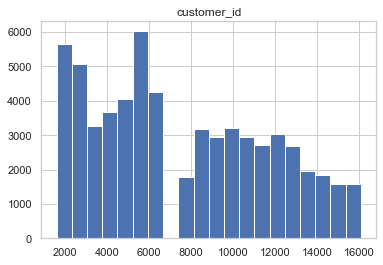

In [552]:
df2.hist(column='customer_id', bins = 20)

# Total sales by each customer

In [553]:
customer_value= {}
for index, row in df2.iterrows():
    if (row['customer_id'] in customer_value):
        customer_value[row['customer_id']] +=  row['Order_value_x']
    else:
        customer_value[row['customer_id']] =  row['Order_value_x']
        
len(df2)

61470

In [554]:
len(customer_value)

9174

In [555]:
customer_value

all_values = customer_value.values()
max_value = max(all_values)

print(max_value)

6932542.0


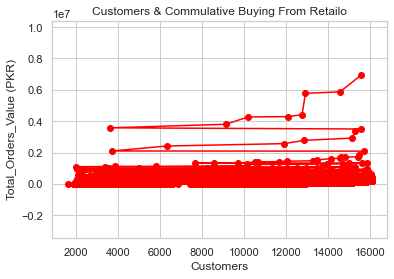

In [556]:
names = list(customer_value.keys())
values = list(customer_value.values())

values = sorted(values)

low = min(values)
high = max(values)
plt.title('Customers & Commulative Buying From Retailo')
plt.xlabel("Customers")
plt.ylabel("Total_Orders_Value (PKR)")
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
plt.plot(names, values,  color='red', marker='o')
plt.grid(True)
#plt.plot(range(len(customer_value)), values,tick_label=names, align='center', width=0.5, color='red', marker='o')


In [557]:
desired_value = 1000000
new_dict = {key:val for key, val in customer_value.items() if val < 100000}
len(new_dict)

8033

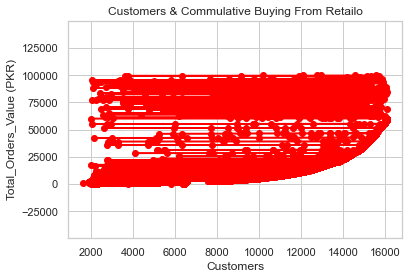

In [558]:
names = list(new_dict.keys())
values = list(new_dict.values())

values = sorted(values)
plt.title('Customers & Commulative Buying From Retailo')
plt.xlabel("Customers")
plt.ylabel("Total_Orders_Value (PKR)")
low = min(values)
high = max(values)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
plt.plot(names, values,  color='red', marker='o')
plt.grid(True)
#plt.plot(range(len(customer_value)), values,tick_label=names, align='center', width=0.5, color='red', marker='o')


# Distribution of Order_Value 

In [559]:
df2.describe()

,customer_id,Order_value_x
count,61470.000000,61470.000000
mean,7594.338100,8553.553596
std,4086.515432,22336.434673
min,1598.000000,0.000000
25%,4120.000000,1997.250000
50%,6363.000000,3962.500000
75%,11024.000000,8153.750000
max,16093.000000,730400.000000


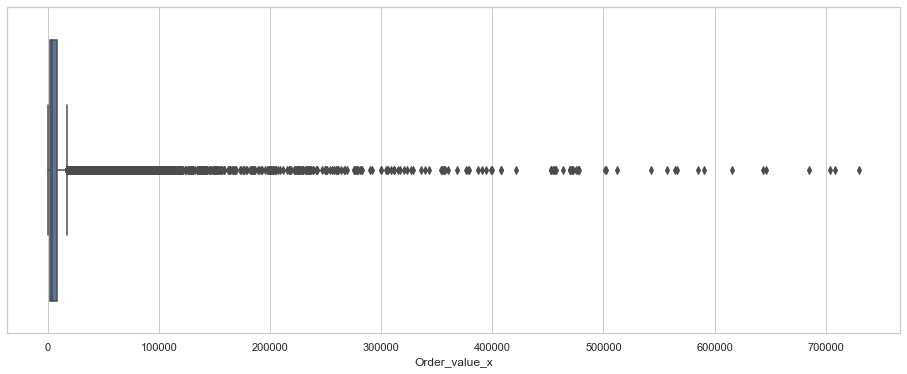

In [560]:
import seaborn as sns

plt.figure(figsize=(16, 6))
sns_plot = sns.boxplot(x=df2['Order_value_x'])

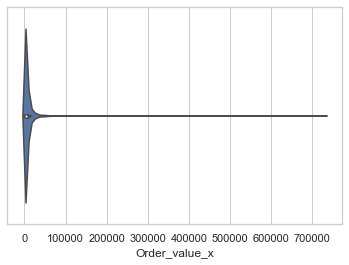

In [561]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=df2["Order_value_x"])

# Total value of orders per day-wise

In [562]:

df2['day'] = pd.DatetimeIndex(df2['order_created']).day_name() # week day name
df2.head()


,order_created,customer_id,Order_value_x,name,phone,location_cordinates,day
0,2019-11-05,6388,1050.0,Pakistan Bakers,92300000000,"{'latitude': 24.948349, 'longitude': 67.082589}",Tuesday
1,2019-11-06,2028,849.0,Rajab Ali,923322771202,"{'longitude': 67.115027, 'latitude': 24.909772}",Wednesday
2,2019-11-06,6389,790.0,Pak Bakery 2,923072730270,"{'latitude': 24.948349, 'longitude': 67.082589}",Wednesday
3,2019-11-07,2027,468.0,Muhammad Ali,923229459343,"{'longitude': 67.099386, 'latitude': 24.941586}",Thursday
4,2019-11-07,2028,4958.0,Rajab Ali,923322771202,"{'longitude': 67.115027, 'latitude': 24.909772}",Thursday


In [563]:
Monday_sales = 0
Tuesday_sales = 0
Wednesday_sales = 0
Thursday_sales = 0
Friday_sales = 0
Saturday_sales = 0
Sunday_sales = 0
week = {}

for index, row in df2.iterrows():
    if (row['day'] == 'Monday'):
        Monday_sales += row['Order_value_x']
    if (row['day'] == 'Tuesday'):
        Tuesday_sales += row['Order_value_x']
    if (row['day'] == 'Wednesday'):
        Wednesday_sales += row['Order_value_x']
    if (row['day'] == 'Thursday'):
        Thursday_sales += row['Order_value_x']
    if (row['day'] == 'Friday'):
        Friday_sales += row['Order_value_x']
    if (row['day'] == 'Saturday'):
        Saturday_sales += row['Order_value_x']
    if (row['day'] == 'Sunday'):
        Sunday_sales += row['Order_value_x']
    
week['Monday'] = Monday_sales    
week['Tuesday'] = Tuesday_sales
week['Wednesday'] = Wednesday_sales
week['Thursday'] = Thursday_sales
week['Friday'] = Friday_sales
week['Saturday'] =  Saturday_sales
week['Sunday'] =  Sunday_sales

In [564]:
week

{'Monday': 97425699.43,
 'Tuesday': 78389540.96000001,
 'Wednesday': 88176414.45000002,
 'Thursday': 71220193.99999999,
 'Friday': 46736275.84999999,
 'Saturday': 85763054.97999999,
 'Sunday': 58075759.85}

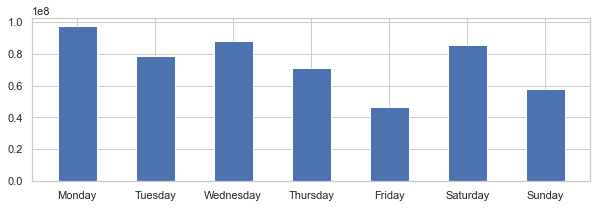

In [565]:
plt.figure(figsize=(10, 3))
names = list(week.keys())
values = list(week.values())

plt.bar(range(len(week)), values, tick_label=names, align='center', width=0.5)
plt.show()

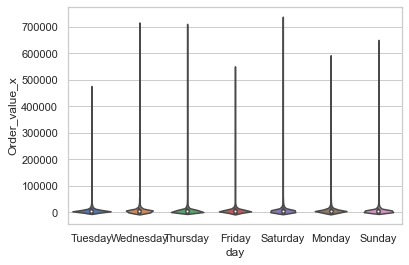

In [566]:
ax = sns.violinplot(x="day", y='Order_value_x', data=df2)

# Most busiest days for business  - Order count per day

In [567]:
Monday_sales = 0
Tuesday_sales = 0
Wednesday_sales = 0
Thursday_sales = 0
Friday_sales = 0
Saturday_sales = 0
Sunday_sales = 0
week = {}

for index, row in df2.iterrows():
    if (row['day'] == 'Monday'):
        Monday_sales += 1
    if (row['day'] == 'Tuesday'):
        Tuesday_sales += 1
    if (row['day'] == 'Wednesday'):
        Wednesday_sales += 1
    if (row['day'] == 'Thursday'):
        Thursday_sales += 1
    if (row['day'] == 'Friday'):
        Friday_sales += 1
    if (row['day'] == 'Saturday'):
        Saturday_sales += 1
    if (row['day'] == 'Sunday'):
        Sunday_sales += 1
    
  
week['Monday'] = Monday_sales    
week['Tuesday'] = Tuesday_sales
week['Wednesday'] = Wednesday_sales
week['Thursday'] = Thursday_sales
week['Friday'] = Friday_sales
week['Saturday'] =  Saturday_sales
week['Sunday'] =  Sunday_sales

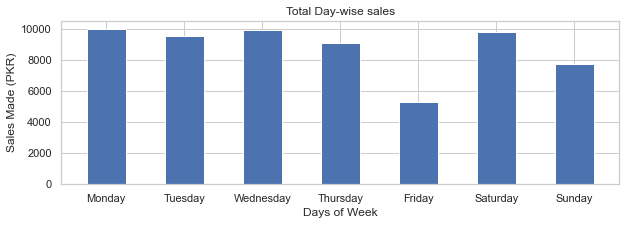

In [568]:
plt.figure(figsize=(10, 3))
names = list(week.keys())
values = list(week.values())

plt.title('Total Day-wise sales')


plt.xlabel("Days of Week")
plt.ylabel("Sales Made (PKR)")

plt.bar(range(len(week)), values, tick_label=names, align='center', width=0.5)
plt.show()

# Freq of orders with respect to Size 

In [569]:
df2.head()

,order_created,customer_id,Order_value_x,name,phone,location_cordinates,day
0,2019-11-05,6388,1050.0,Pakistan Bakers,92300000000,"{'latitude': 24.948349, 'longitude': 67.082589}",Tuesday
1,2019-11-06,2028,849.0,Rajab Ali,923322771202,"{'longitude': 67.115027, 'latitude': 24.909772}",Wednesday
2,2019-11-06,6389,790.0,Pak Bakery 2,923072730270,"{'latitude': 24.948349, 'longitude': 67.082589}",Wednesday
3,2019-11-07,2027,468.0,Muhammad Ali,923229459343,"{'longitude': 67.099386, 'latitude': 24.941586}",Thursday
4,2019-11-07,2028,4958.0,Rajab Ali,923322771202,"{'longitude': 67.115027, 'latitude': 24.909772}",Thursday


Text(0, 0.5, 'Frequency')

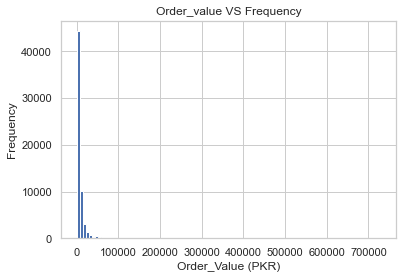

In [570]:

df2.hist(column='Order_value_x', bins = 100)

plt.title('Order_value VS Frequency')


plt.xlabel("Order_Value (PKR)")
plt.ylabel("Frequency")



# Frequency of Orders 

In [571]:
item_counts = df2["customer_id"].value_counts()
#print(item_counts)
item_counts = dict(item_counts)

print(item_counts)

{2334: 161, 2123: 153, 2852: 131, 2224: 119, 4955: 118, 2598: 116, 2124: 114, 2392: 111, 2129: 109, 2192: 105, 2197: 105, 2101: 101, 3291: 100, 2454: 99, 2095: 98, 2902: 98, 5772: 95, 2158: 93, 5016: 93, 2217: 93, 4196: 92, 4202: 89, 2435: 88, 2254: 88, 2017: 87, 2255: 87, 2086: 87, 4676: 83, 4010: 83, 2266: 83, 2130: 82, 2972: 82, 2027: 78, 2048: 77, 4102: 74, 2089: 73, 2904: 70, 5627: 70, 2490: 69, 3787: 69, 2316: 69, 3302: 68, 9901: 67, 2324: 67, 2494: 66, 2025: 66, 5535: 65, 2548: 65, 2245: 64, 2196: 63, 2423: 63, 6497: 63, 2212: 63, 6363: 62, 5382: 61, 6126: 61, 2832: 61, 2092: 61, 2145: 61, 5450: 60, 2488: 59, 2208: 59, 5551: 59, 3621: 58, 6130: 58, 2173: 58, 2957: 58, 1906: 58, 2835: 57, 6274: 57, 5897: 57, 4424: 56, 2432: 56, 5980: 55, 2029: 55, 3105: 55, 2006: 55, 2248: 55, 2480: 55, 2905: 54, 2104: 54, 5771: 54, 2920: 54, 2066: 54, 5917: 54, 5963: 54, 5054: 53, 2077: 53, 6161: 53, 5472: 53, 8771: 52, 4796: 52, 8381: 52, 6044: 52, 8828: 52, 5623: 52, 6137: 51, 2161: 51, 6392: 

(array([3.884e+03, 1.751e+03, 9.440e+02, 6.290e+02, 4.190e+02, 2.920e+02,
        2.480e+02, 1.660e+02, 1.190e+02, 1.020e+02, 7.500e+01, 6.600e+01,
        5.700e+01, 6.300e+01, 4.200e+01, 4.400e+01, 2.400e+01, 3.100e+01,
        2.300e+01, 2.700e+01, 2.000e+01, 1.300e+01, 1.300e+01, 1.100e+01,
        1.200e+01, 9.000e+00, 1.100e+01, 8.000e+00, 8.000e+00, 4.000e+00,
        6.000e+00, 5.000e+00, 4.000e+00, 3.000e+00, 5.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 3.000e+00,
        0.000e+00, 5.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array

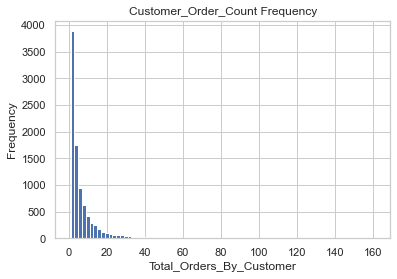

In [572]:
plt.title('Customer_Order_Count Frequency')


plt.xlabel("Total_Orders_By_Customer")
plt.ylabel("Frequency")


plt.hist(item_counts.values(), bins = 80)

# Comparing Global Effect with Local Effect

In [573]:
df = pd.read_excel("Faraz_Network.xlsx", engine='openpyxl')



# Basic Data Cleaning

In [574]:
df.head()

,Unnamed: 0,order_created,customer_id,Order_value,name,phone,user_created_at,latitude,longitude
0,478,2020-02-06,6393,3178.76,Shalimar Noman Store,923159255155,2020-02-10,24.769556,24.769556
1,1310,2020-03-13,2644,5417.00,Raza,923312135084,2020-03-15,24.913448,67.141357
2,4400,2020-06-13,2253,12640.00,Rehman Ali,923003649058,2020-02-25,24.908301,67.136216
3,8009,2020-07-13,2247,1475.00,Adil,923323725199,2020-02-24,24.907790,67.132878
4,16060,2020-08-31,2195,2200.00,Ghulam Raza,923322720499,2020-02-22,24.907962,67.135644


In [575]:
df.sort_values(by=['order_created'])

,Unnamed: 0,order_created,customer_id,Order_value,name,phone,user_created_at,latitude,longitude
0,478,2020-02-06,6393,3178.76,Shalimar Noman Store,923159255155,2020-02-10,24.769556,24.769556
1,1310,2020-03-13,2644,5417.00,Raza,923312135084,2020-03-15,24.913448,67.141357
2,4400,2020-06-13,2253,12640.00,Rehman Ali,923003649058,2020-02-25,24.908301,67.136216
3,8009,2020-07-13,2247,1475.00,Adil,923323725199,2020-02-24,24.907790,67.132878
4,16060,2020-08-31,2195,2200.00,Ghulam Raza,923322720499,2020-02-22,24.907962,67.135644
5,16435,2020-09-01,2239,1360.00,Abdullah Sheikh,923153513895,2020-02-24,24.907352,67.134145
6,30163,2020-09-27,2185,1735.00,Jameel Ahmed,923332211713,2020-02-22,24.911067,67.129497
7,34887,2020-10-06,2187,5300.00,Sarmad,923447726500,2020-02-22,24.910852,67.129428
8,35511,2020-10-07,2193,10065.00,Baber,923473403833,2020-02-22,24.910273,67.131835
9,50825,2020-10-31,2272,8715.00,Asad,923032798358,2020-02-26,24.908596,67.131300


In [576]:
#df1 = df.groupby('order_created')[['order_complete']].sum()

df1 = df.groupby(
    ['order_created', 'customer_id']
).agg(
    {
        # Find the min, max, and sum of the duration column
        'Order_value': 'sum' ,
        
    }
)

In [577]:
df1.head()

,,Order_value
order_created,customer_id,
2020-02-06,6393,3178.76
2020-03-13,2644,5417.00
2020-06-13,2253,12640.00
2020-07-13,2247,1475.00
2020-08-31,2195,2200.00


In [578]:
df2 = pd.merge( df1,df, on=['Order_value','customer_id'], how='inner')

In [579]:
df2.head()

,Order_value,customer_id,Unnamed: 0,order_created,name,phone,user_created_at,latitude,longitude
0,3178.76,6393,478,2020-02-06,Shalimar Noman Store,923159255155,2020-02-10,24.769556,24.769556
1,5417.00,2644,1310,2020-03-13,Raza,923312135084,2020-03-15,24.913448,67.141357
2,12640.00,2253,4400,2020-06-13,Rehman Ali,923003649058,2020-02-25,24.908301,67.136216
3,1475.00,2247,8009,2020-07-13,Adil,923323725199,2020-02-24,24.907790,67.132878
4,2200.00,2195,16060,2020-08-31,Ghulam Raza,923322720499,2020-02-22,24.907962,67.135644


In [580]:
item_counts = df2["customer_id"].value_counts()
print(item_counts)
item_counts = dict(item_counts)

len(item_counts)


2239    1
2551    1
2181    1
2249    1
2200    1
2199    1
2644    1
2195    1
2194    1
2193    1
2192    1
2575    1
2190    1
2253    1
2188    1
2187    1
2185    1
2248    1
2247    1
2487    1
2245    1
2243    1
2178    1
2204    1
2202    1
2270    1
2553    1
2111    1
2321    1
2234    1
6393    1
2104    1
2231    1
2485    1
2583    1
2546    1
2196    1
2271    1
2220    1
2217    1
2549    1
2480    1
2213    1
2212    1
2224    1
2210    1
2272    1
2206    1
Name: customer_id, dtype: int64


48

In [581]:
df2 = df2.drop('Unnamed: 0', axis=1) 

In [582]:
item_counts = df2["customer_id"].value_counts()
print(item_counts)
item_counts = dict(item_counts)

len(item_counts)


2239    1
2551    1
2181    1
2249    1
2200    1
2199    1
2644    1
2195    1
2194    1
2193    1
2192    1
2575    1
2190    1
2253    1
2188    1
2187    1
2185    1
2248    1
2247    1
2487    1
2245    1
2243    1
2178    1
2204    1
2202    1
2270    1
2553    1
2111    1
2321    1
2234    1
6393    1
2104    1
2231    1
2485    1
2583    1
2546    1
2196    1
2271    1
2220    1
2217    1
2549    1
2480    1
2213    1
2212    1
2224    1
2210    1
2272    1
2206    1
Name: customer_id, dtype: int64


48

In [583]:
df2 = df2.drop_duplicates()


In [584]:
len(df2)

48

In [585]:
df2 = df2.drop('user_created_at', axis=1) 

In [586]:
df2.sort_values(['order_created', "Order_value"], ascending = True)

,Order_value,customer_id,order_created,name,phone,latitude,longitude
0,3178.76,6393,2020-02-06,Shalimar Noman Store,923159255155,24.769556,24.769556
1,5417.00,2644,2020-03-13,Raza,923312135084,24.913448,67.141357
2,12640.00,2253,2020-06-13,Rehman Ali,923003649058,24.908301,67.136216
3,1475.00,2247,2020-07-13,Adil,923323725199,24.907790,67.132878
4,2200.00,2195,2020-08-31,Ghulam Raza,923322720499,24.907962,67.135644
5,1360.00,2239,2020-09-01,Abdullah Sheikh,923153513895,24.907352,67.134145
6,1735.00,2185,2020-09-27,Jameel Ahmed,923332211713,24.911067,67.129497
7,5300.00,2187,2020-10-06,Sarmad,923447726500,24.910852,67.129428
8,10065.00,2193,2020-10-07,Baber,923473403833,24.910273,67.131835
9,8715.00,2272,2020-10-31,Asad,923032798358,24.908596,67.131300


# Frequency of Order of each Retailer 

array([[<AxesSubplot:title={'center':'customer_id'}>]], dtype=object)

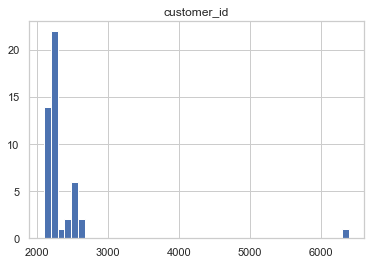

In [587]:
df2.hist(column='customer_id', bins = 45)

# Total sales by each customer

In [588]:
customer_value= {}
for index, row in df2.iterrows():
    if (row['customer_id'] in customer_value):
        customer_value[row['customer_id']] +=  row['Order_value']
    else:
        customer_value[row['customer_id']] =  row['Order_value']
        
len(df2)

48

In [589]:
customer_value

all_values = customer_value.values()
max_value = max(all_values)

print(max_value)

24350.0


<BarContainer object of 48 artists>

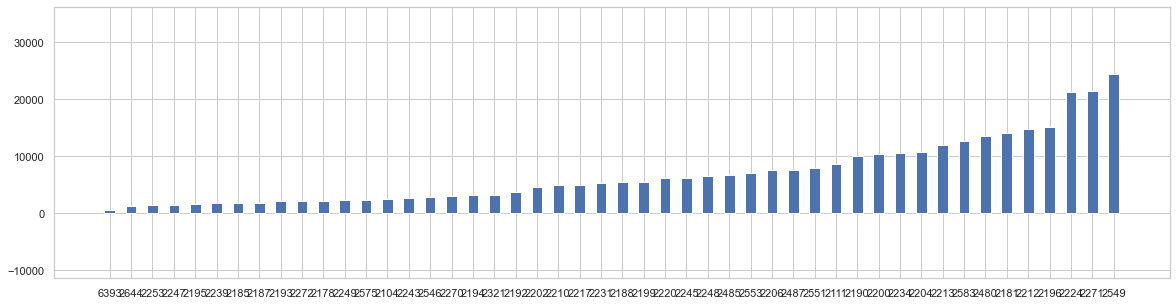

In [590]:
import math
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 5))
names = list(customer_value.keys())
values = list(customer_value.values())

values = sorted(values)

low = min(values)
high = max(values)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
plt.bar(range(len(customer_value)), values, tick_label=names, align='center', width=0.5)
#plt.show()

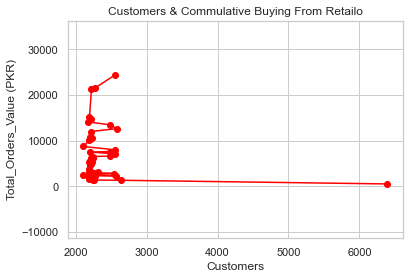

In [591]:
names = list(customer_value.keys())
values = list(customer_value.values())

values = sorted(values)
plt.title('Customers & Commulative Buying From Retailo')
plt.xlabel("Customers")
plt.ylabel("Total_Orders_Value (PKR)")

low = min(values)
high = max(values)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
plt.plot(names, values,  color='red', marker='o')
plt.grid(True)
#plt.plot(range(len(customer_value)), values,tick_label=names, align='center', width=0.5, color='red', marker='o')


# Distribution of Order_Value 

In [592]:
df2.describe()

,Order_value,customer_id,phone,latitude,longitude
count,48.000000,48.000000,4.800000e+01,48.000000,48.000000
mean,6867.599167,2370.208333,9.232215e+11,24.906290,66.252438
std,5732.515467,609.742951,1.497472e+08,0.020284,6.114934
min,501.000000,2104.000000,9.230036e+11,24.769556,24.769556
25%,2296.250000,2195.750000,9.230993e+11,24.907483,67.131614
50%,5358.500000,2227.500000,9.232416e+11,24.908173,67.135592
75%,10138.750000,2284.250000,9.233328e+11,24.910449,67.138142
max,24350.000000,6393.000000,9.234734e+11,24.913885,67.141432


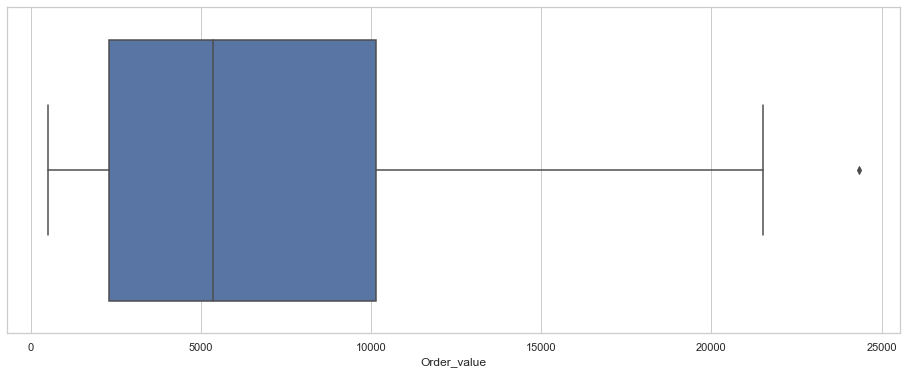

In [593]:
import seaborn as sns

plt.figure(figsize=(16, 6))
sns_plot = sns.boxplot(x=df2['Order_value'])

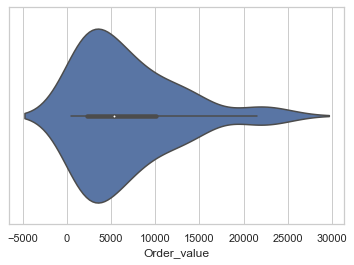

In [594]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=df2["Order_value"])

# Total value of orders per day-wise

In [595]:

df2['day'] = pd.DatetimeIndex(df2['order_created']).day_name() # week day name
df2.head()


,Order_value,customer_id,order_created,name,phone,latitude,longitude,day
0,3178.76,6393,2020-02-06,Shalimar Noman Store,923159255155,24.769556,24.769556,Thursday
1,5417.00,2644,2020-03-13,Raza,923312135084,24.913448,67.141357,Friday
2,12640.00,2253,2020-06-13,Rehman Ali,923003649058,24.908301,67.136216,Saturday
3,1475.00,2247,2020-07-13,Adil,923323725199,24.907790,67.132878,Monday
4,2200.00,2195,2020-08-31,Ghulam Raza,923322720499,24.907962,67.135644,Monday


In [605]:
Monday_sales = 0
Tuesday_sales = 0
Wednesday_sales = 0
Thursday_sales = 0
Friday_sales = 0
Saturday_sales = 0
Sunday_sales = 0
week = {}

for index, row in df2.iterrows():
    if (row['day'] == 'Monday'):
        Tuesday_sales += row['Order_value']
    if (row['day'] == 'Tuesday'):
        Monday_sales += row['Order_value']
    if (row['day'] == 'Wednesday'):
        Wednesday_sales += row['Order_value']
    if (row['day'] == 'Thursday'):
        Friday_sales += row['Order_value']
    if (row['day'] == 'Friday'):
        Thursday_sales += row['Order_value']
    if (row['day'] == 'Saturday'):
        Saturday_sales += row['Order_value']
    if (row['day'] == 'Sunday'):
        Sunday_sales += row['Order_value']
    
week['Monday'] = Monday_sales
    
week['Tuesday'] = Tuesday_sales
week['Wednesday'] = Wednesday_sales
week['Thursday'] = Thursday_sales
week['Friday'] = Friday_sales
week['Saturday'] =  Saturday_sales
week['Sunday'] =  Sunday_sales

In [606]:
week

{'Monday': 64242.0,
 'Tuesday': 40957.0,
 'Wednesday': 48525.0,
 'Thursday': 54173.0,
 'Friday': 16826.760000000002,
 'Saturday': 54558.0,
 'Sunday': 50363.0}

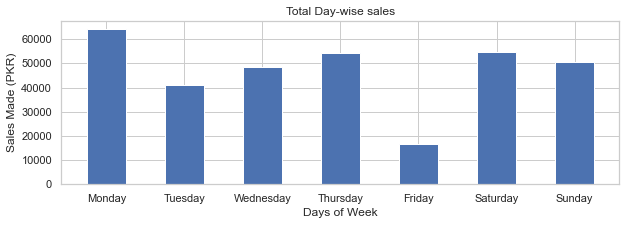

In [607]:
plt.figure(figsize=(10, 3))
names = list(week.keys())
values = list(week.values())

plt.title('Total Day-wise sales')


plt.xlabel("Days of Week")
plt.ylabel("Sales Made (PKR)")

plt.bar(range(len(week)), values, tick_label=names, align='center', width=0.5)
plt.show()

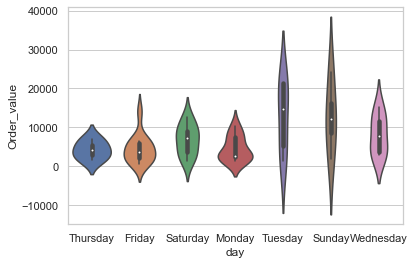

In [599]:
ax = sns.violinplot(x="day", y='Order_value', data=df2)

# Most busiest days for business  - Order count per day

In [600]:
Monday_sales = 0
Tuesday_sales = 0
Wednesday_sales = 0
Thursday_sales = 0
Friday_sales = 0
Saturday_sales = 0
Sunday_sales = 0
week = {}

for index, row in df2.iterrows():
    if (row['day'] == 'Monday'):
        Monday_sales += 1
    if (row['day'] == 'Tuesday'):
        Tuesday_sales += 1
    if (row['day'] == 'Wednesday'):
        Wednesday_sales += 1
    if (row['day'] == 'Thursday'):
        Thursday_sales += 1
    if (row['day'] == 'Friday'):
        Friday_sales += 1
    if (row['day'] == 'Saturday'):
        Saturday_sales += 1
    if (row['day'] == 'Sunday'):
        Sunday_sales += 1
    
week['Monday'] = Monday_sales
   
week['Tuesday'] = Tuesday_sales
week['Wednesday'] = Wednesday_sales
week['Thursday'] = Thursday_sales
week['Friday'] = Friday_sales
week['Saturday'] =  Saturday_sales
week['Sunday'] =  Sunday_sales

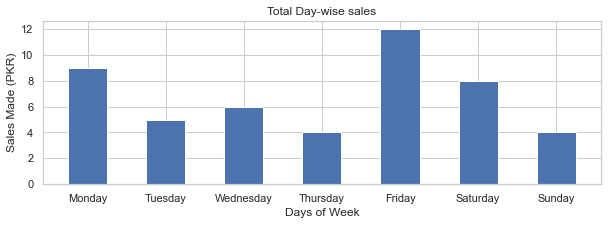

In [601]:
plt.figure(figsize=(10, 3))
names = list(week.keys())
values = list(week.values())
plt.title('Total Day-wise sales')


plt.xlabel("Days of Week")
plt.ylabel("Sales Made (PKR)")


plt.bar(range(len(week)), values, tick_label=names, align='center', width=0.5)
plt.show()

# Freq of orders with respect to Size 

Text(0, 0.5, 'Frequency')

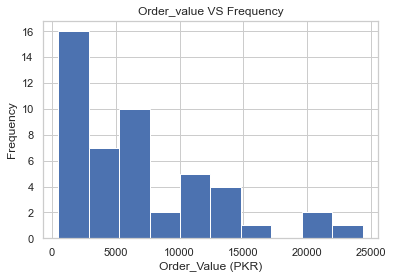

In [602]:
df2.hist(column='Order_value', bins = 10)

plt.title('Order_value VS Frequency')


plt.xlabel("Order_Value (PKR)")
plt.ylabel("Frequency")



# Frequency of Orders 

In [603]:
item_counts = df2["customer_id"].value_counts()
#print(item_counts)
item_counts = dict(item_counts)

print(item_counts)

{2239: 1, 2551: 1, 2181: 1, 2249: 1, 2200: 1, 2199: 1, 2644: 1, 2195: 1, 2194: 1, 2193: 1, 2192: 1, 2575: 1, 2190: 1, 2253: 1, 2188: 1, 2187: 1, 2185: 1, 2248: 1, 2247: 1, 2487: 1, 2245: 1, 2243: 1, 2178: 1, 2204: 1, 2202: 1, 2270: 1, 2553: 1, 2111: 1, 2321: 1, 2234: 1, 6393: 1, 2104: 1, 2231: 1, 2485: 1, 2583: 1, 2546: 1, 2196: 1, 2271: 1, 2220: 1, 2217: 1, 2549: 1, 2480: 1, 2213: 1, 2212: 1, 2224: 1, 2210: 1, 2272: 1, 2206: 1}


(array([ 0.,  0.,  0.,  0.,  0., 48.,  0.,  0.,  0.,  0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

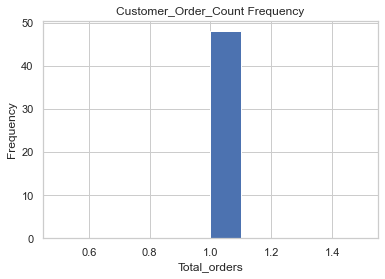

In [604]:
plt.title('Customer_Order_Count Frequency')


plt.xlabel("Total_orders")
plt.ylabel("Frequency")

plt.hist(item_counts.values(), bins = 10)